In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
project_path = "/content/drive/MyDrive/BankMarketingProject/"


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/BankMarketingProject/data/raw/bank.csv", sep=";")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


Text(0.5, 1.0, 'Distribution of Target label')

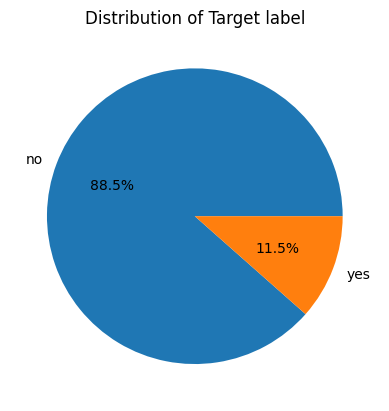

In [ ]:
plt.pie(df["y"].value_counts(), autopct='%1.1f%%', labels = ["no","yes"])
plt.title("Distribution of Target label")

/tmp/ipython-input-1642285822.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[a,b].set_xticklabels(axes[a,b].get_xticklabels(), rotation=30)
/tmp/ipython-input-1642285822.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[a,b].set_xticklabels(axes[a,b].get_xticklabels(), rotation=30)
/tmp/ipython-input-1642285822.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[a,b].set_xticklabels(axes[a,b].get_xticklabels(), rotation=30)
/tmp/ipython-input-1642285822.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[a,b].set_xticklabels(axes[a,b].get_xticklabels(), rotation=30)
/tmp/ipython-input-1642285822.py:14: UserWarning: set_tickla

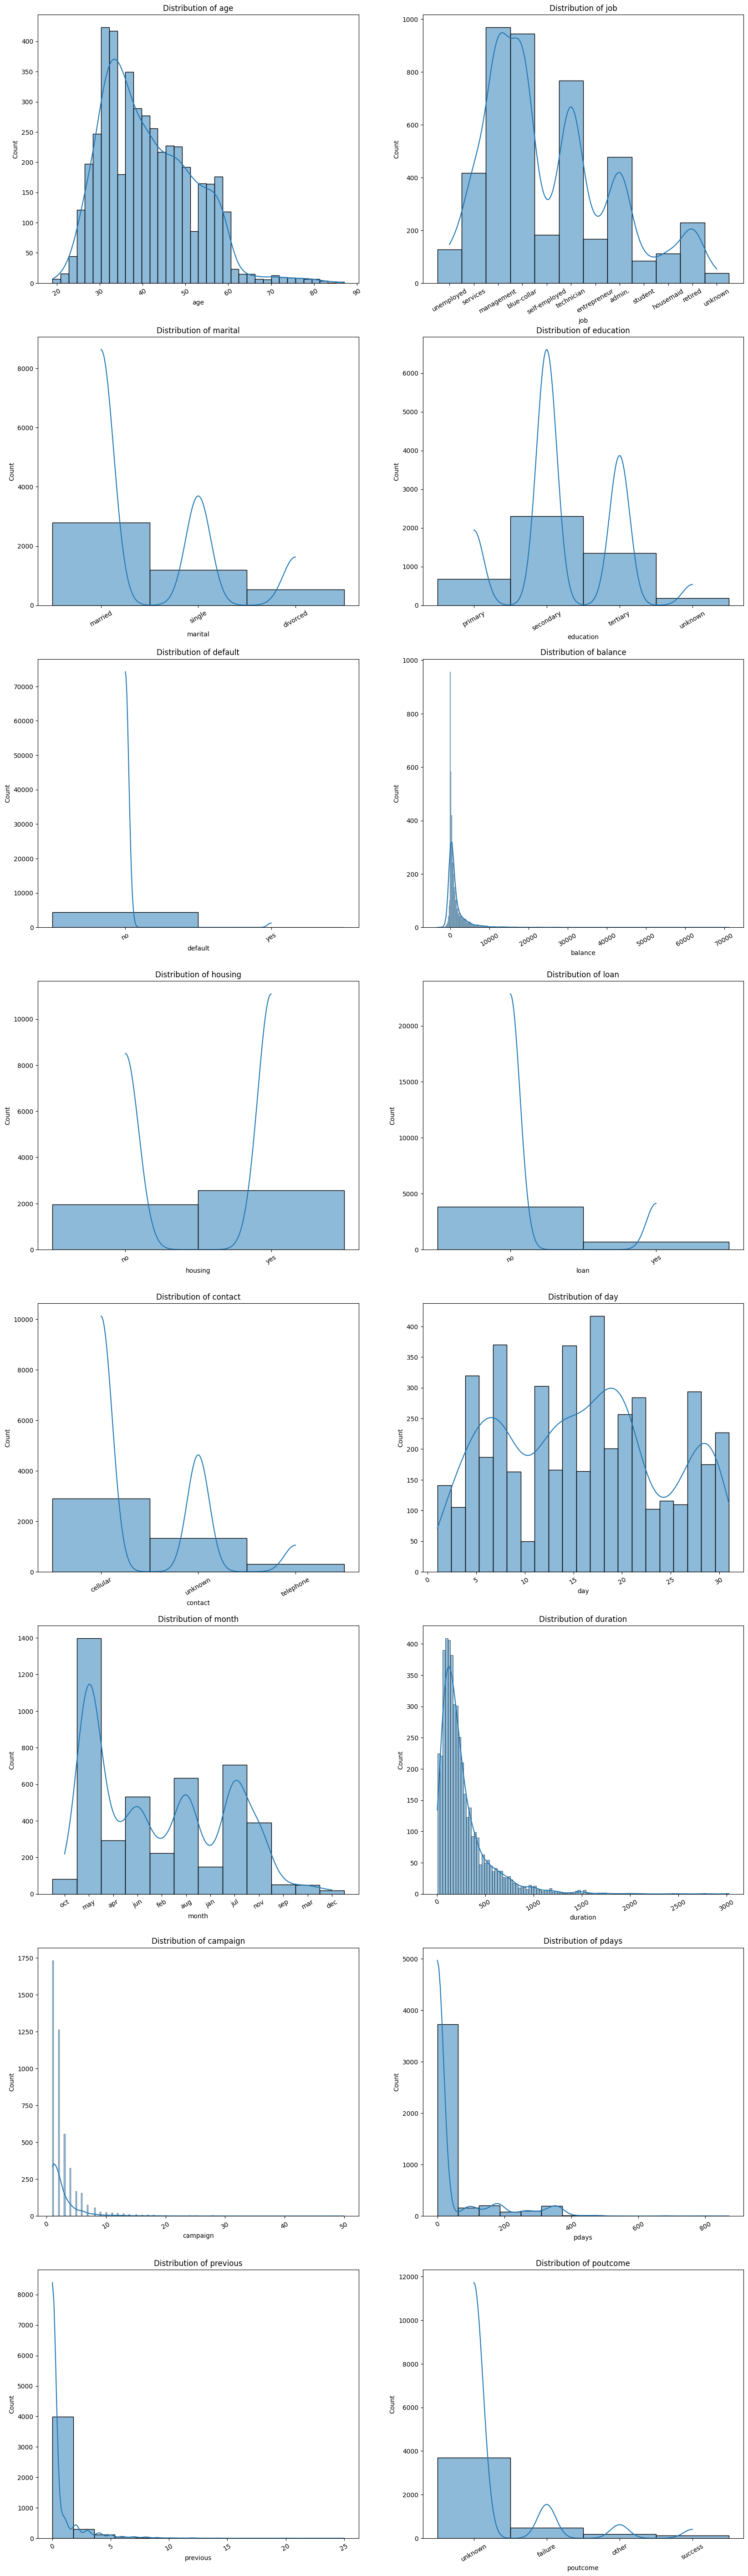

In [ ]:
fig, axes = plt.subplots(8, 2, figsize=(20, 72))

fnames = df.columns
a = 0
b = 0

for column in fnames[:-1]:
    if b == 2:
        b = 0
        a += 1

    sns.histplot(data=df[column], kde=True, ax = axes[a,b])
    axes[a,b].set_title(f"Distribution of {column}")
    axes[a,b].set_xticklabels(axes[a,b].get_xticklabels(), rotation=30)
    b += 1
plt.show()


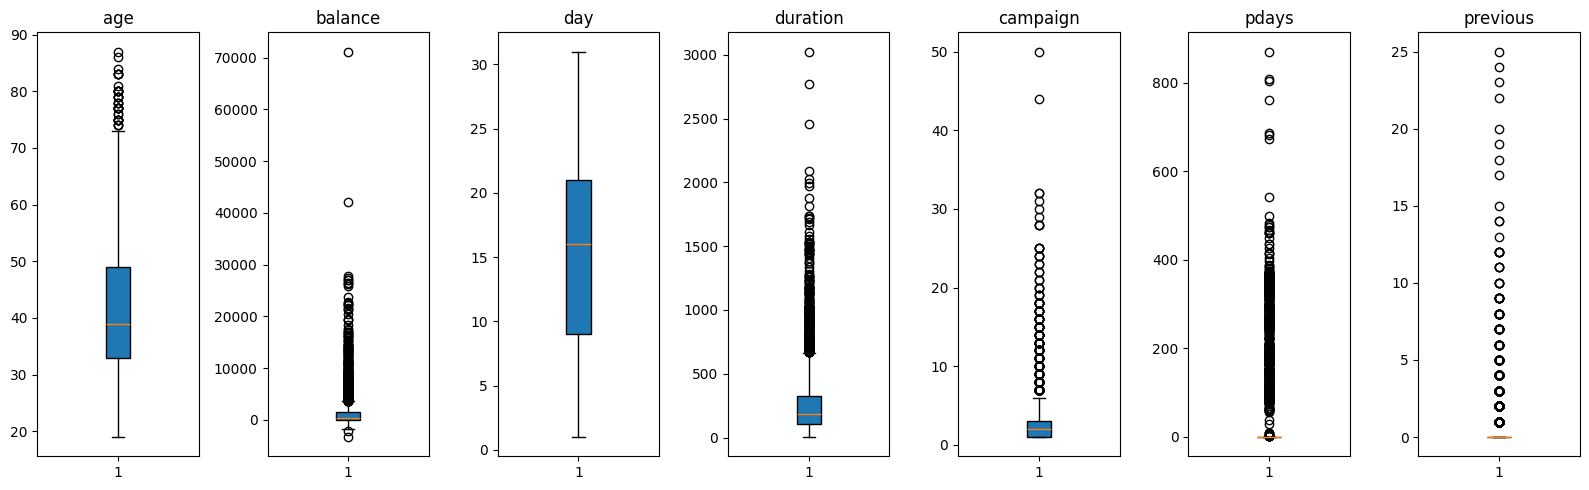

In [ ]:
fig, axes = plt.subplots(1, 7, figsize=(16, 5))
a = 0
for i in df.select_dtypes(include=np.number).columns:
    axes[a].boxplot(df[i], patch_artist=True)
    axes[a].set_title(i)
    a+=1
plt.tight_layout()

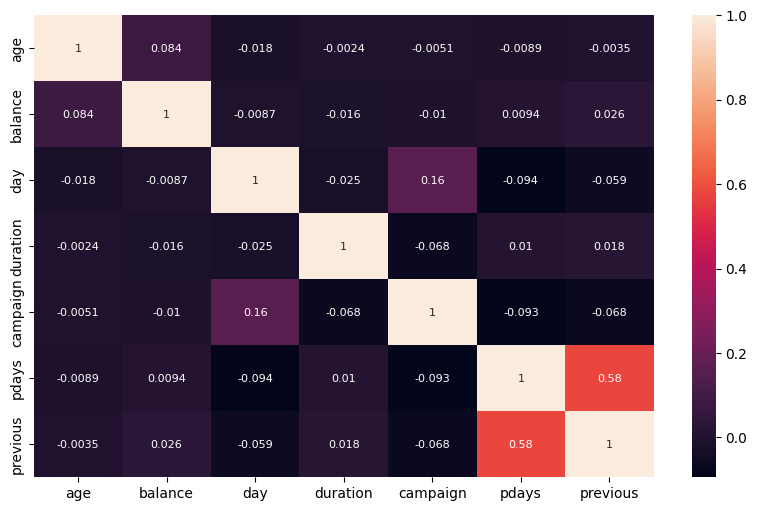

In [ ]:
corr_df = df[["age","balance","day","duration","campaign","pdays","previous"]]

correlation_matrix = corr_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, annot_kws={'size': 8})
plt.show()

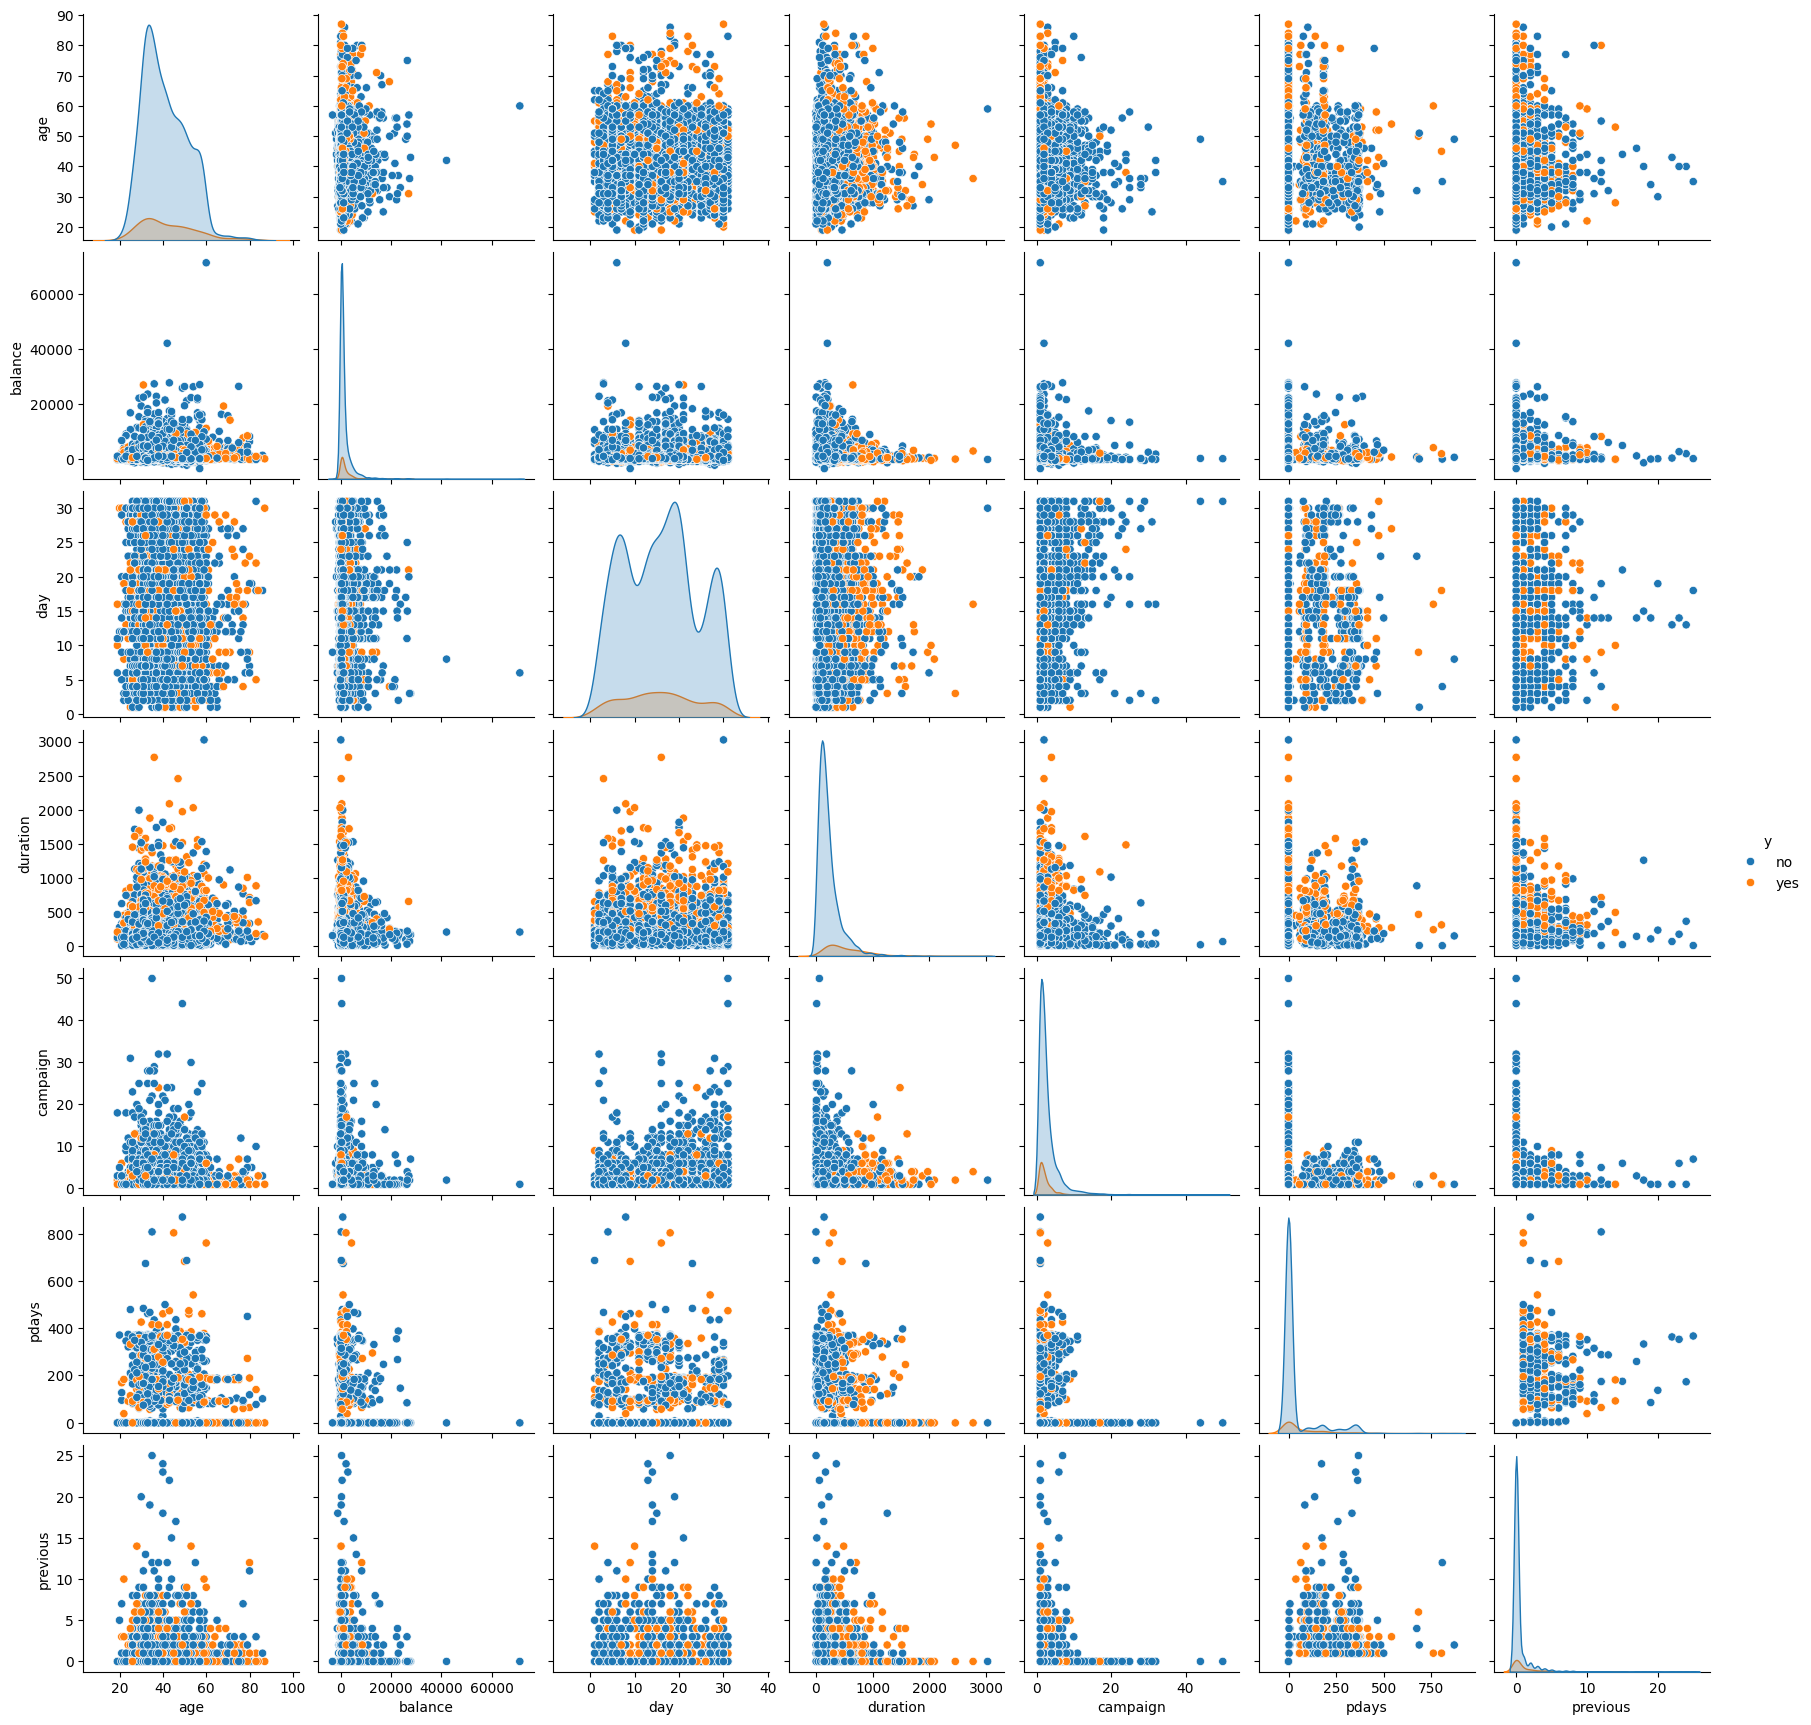

In [ ]:
sns.pairplot(df, hue="y")

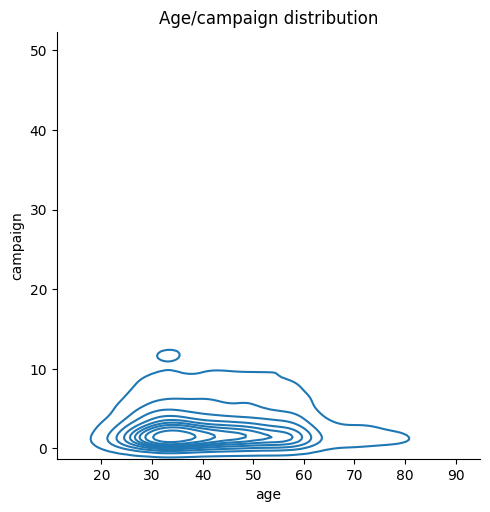

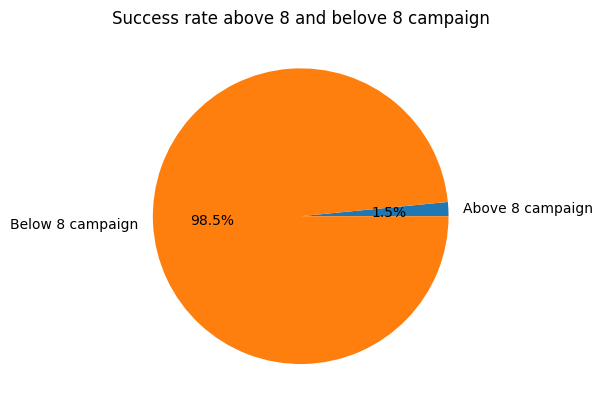

In [ ]:
sns.displot(data=df, x="age", y="campaign", kind="kde")
plt.title("Age/campaign distribution")
plt.show()

d = df[(df['y'] == 'yes') & (df['campaign'] >8)]
d = np.array(d)
f = df[(df['y'] == 'yes') & (df['campaign'] <= 8)]
f = np.array(f)
z = np.array([d.shape[0], f.shape[0]])
plt.pie(z, autopct='%1.1f%%', labels = ["Above 8 campaign","Below 8 campaign"])
plt.title("Success rate above 8 and belove 8 campaign")
plt.show()


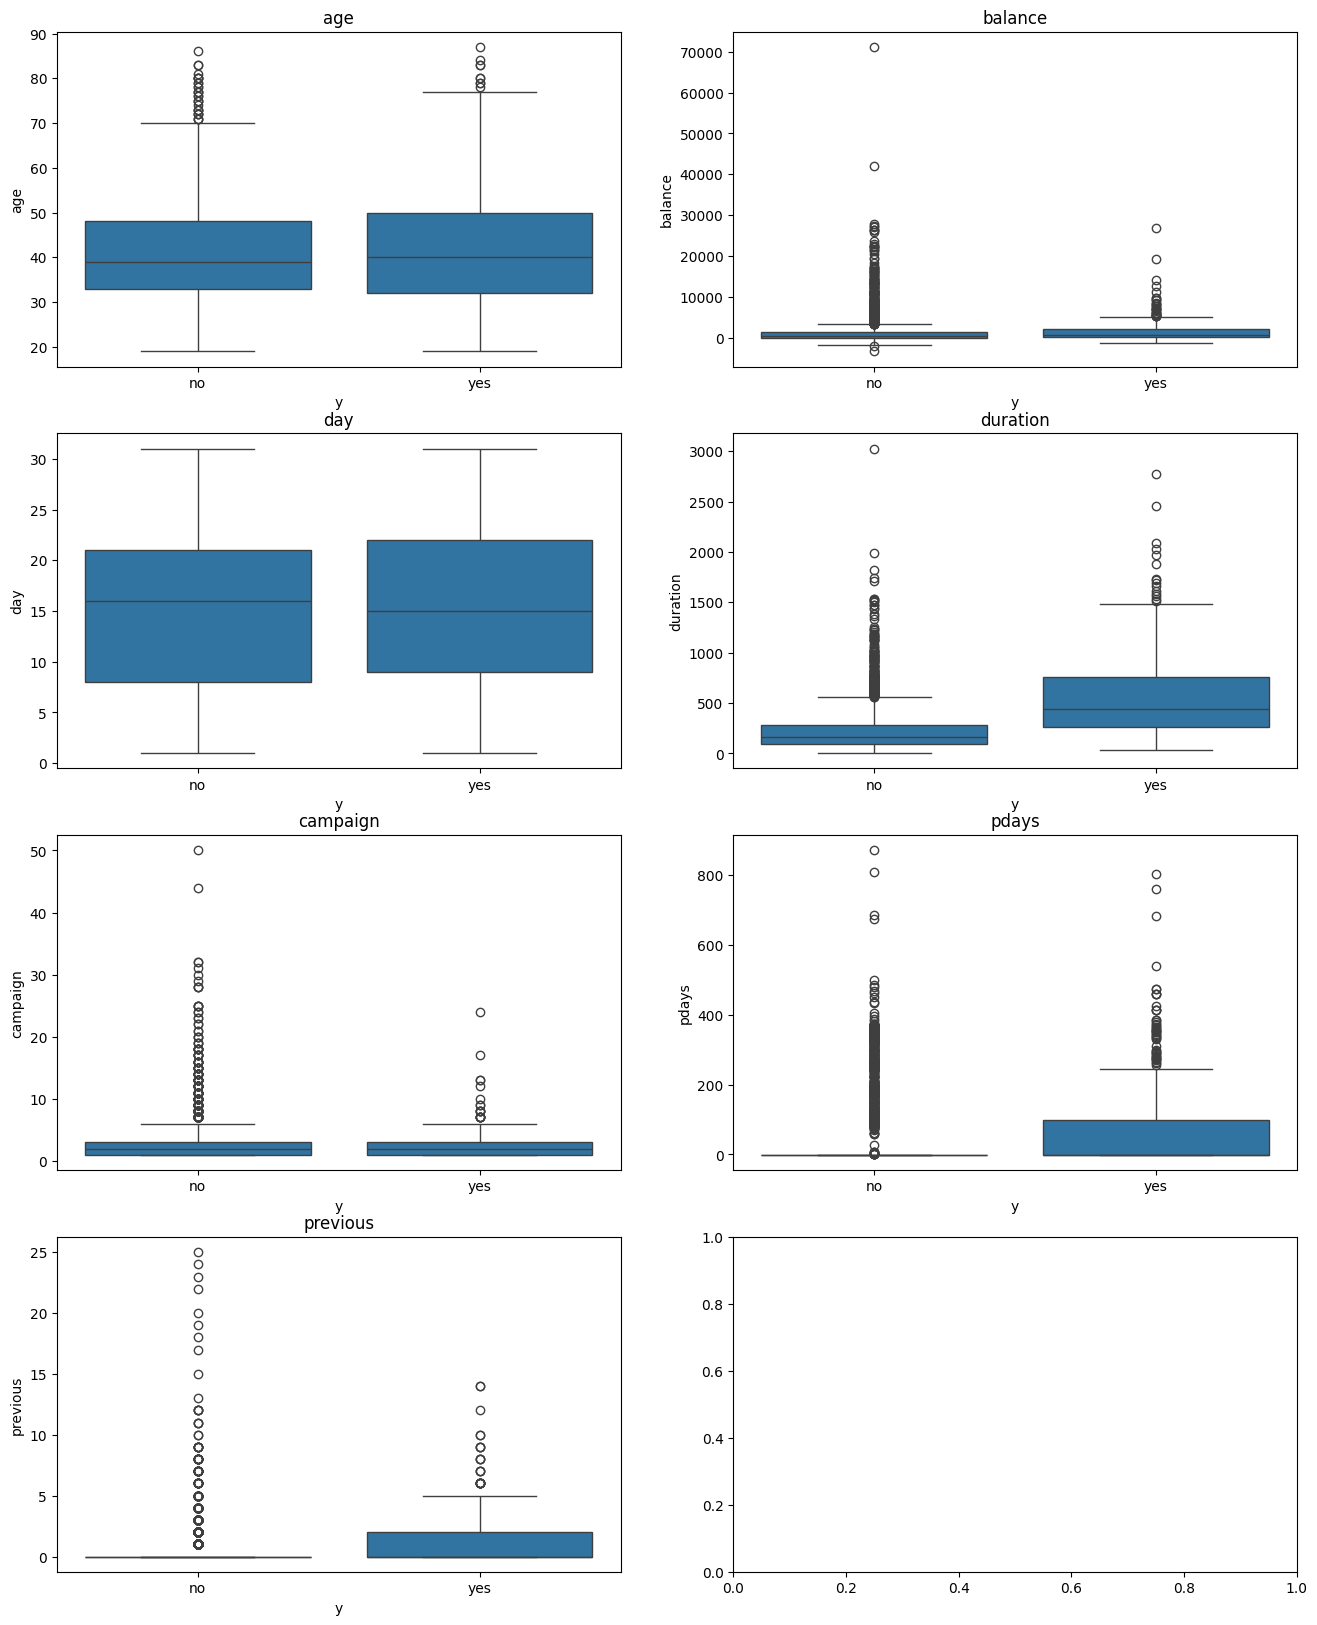

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(16, 20))

a = 0
b = 0

for i in fnames:
    if b == 2:
        b = 0
        a += 1

    if df[i].dtype == "int64":
        sns.boxplot(data=df,x="y", y=i, ax = axes[a,b])
        axes[a,b].set_title(i)
        b+=1
plt.show()


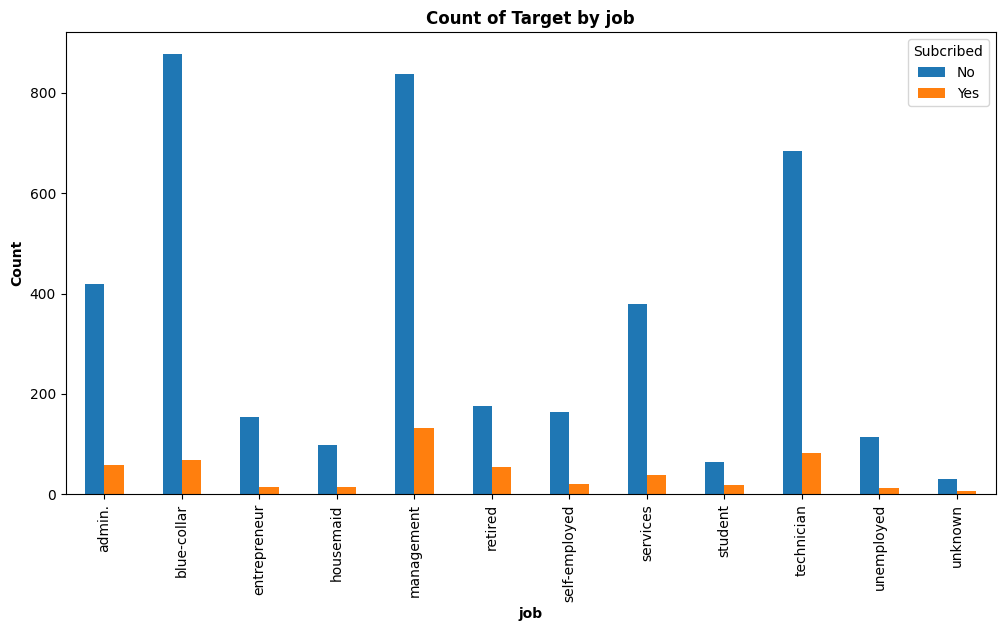

In [ ]:
names = ["job","marital","education","default","housing","loan","contact","poutcome", "month"]

def categoricdist(name):
    t = df.groupby([name,"y"]).size().unstack(fill_value=0)
    t.plot(kind='bar', stacked=False, figsize=(12, 6))
    plt.xlabel(name, fontweight='bold')
    plt.ylabel('Count', fontweight='bold')
    plt.title(f'Count of Target by {name}', fontweight='bold')
    plt.legend(title='Subcribed', labels=['No', 'Yes'])
    plt.show()

categoricdist("job")


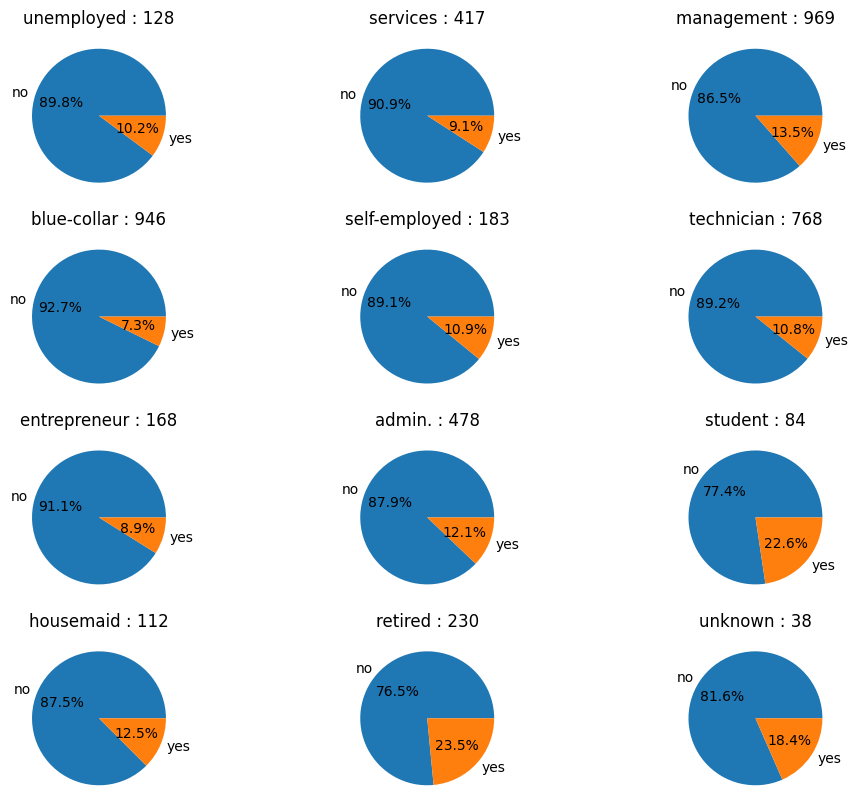

In [ ]:
jobs = df["job"].unique()
fig, axes = plt.subplots(4, 3, figsize=(12, 10))
a = 0
b = 0
for i in jobs:
    if b == 3:
        b = 0
        a += 1
    d = df[df["job"] == i]
    job_datas = d.groupby('job')['y'].value_counts()
    axes[a,b].pie(job_datas, autopct='%1.1f%%', labels = ["no","yes"])
    axes[a,b].set_title(f"{i} : {job_datas.sum()}")
    b+=1

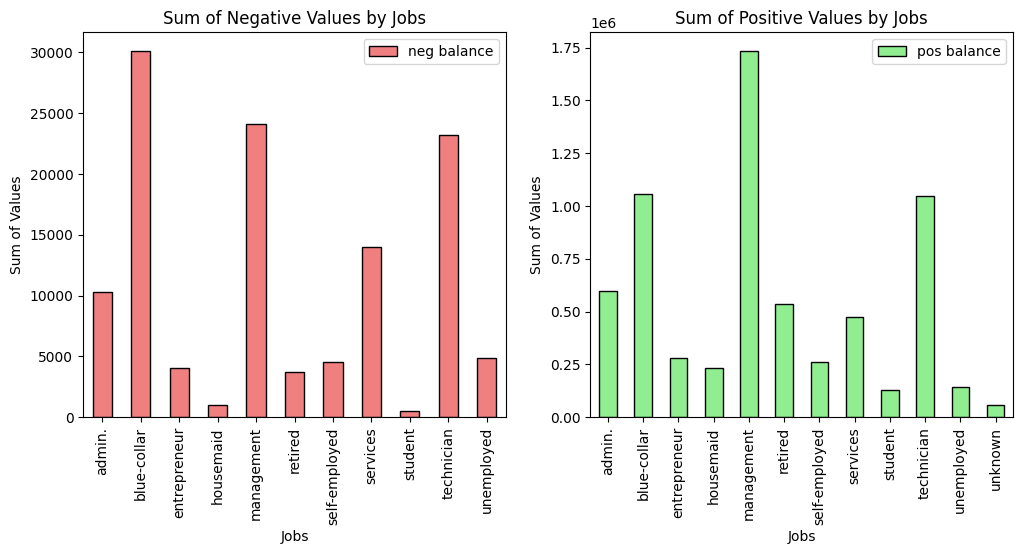

In [ ]:
pos_values_df = df[df['balance'] >= 0]
t = pos_values_df.groupby('job')['balance'].sum().abs()
negative_values_df = df[df['balance'] < 0]
z = negative_values_df.groupby('job')['balance'].sum().abs()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

z.plot(kind = "bar", color = "lightcoral", edgecolor = "black", ax = ax1)
ax1.set_title('Sum of Negative Values by Jobs')
ax1.set_xlabel('Jobs')
ax1.set_ylabel('Sum of Values')
ax1.legend(labels=["neg balance"])
t.plot(kind = "bar", color = "lightgreen",edgecolor='black', ax = ax2)
ax2.set_title('Sum of Positive Values by Jobs')
ax2.set_xlabel('Jobs')
ax2.set_ylabel('Sum of Values')
ax2.legend(labels=["pos balance"])

<Axes: >

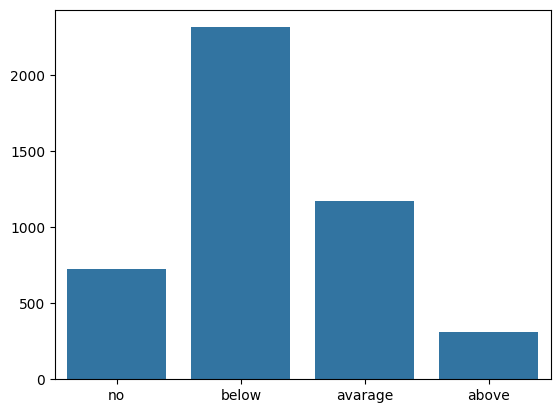

In [ ]:
#fig, axes = plt.subplots(2, 2, figsize=(12, 10))

no = df[df["balance"] <= 0]
below = df[(df["balance"] <= 1000) & (df["balance"] > 0)]
avarage = df[(df["balance"] <= 5000) & (df["balance"] > 1000)]
above = df[df["balance"] > 5000]

data = {
    "no" : no["balance"],
    "below" : below["balance"],
    "avarage" : avarage["balance"],
    "above" : above["balance"],
    "y" : df["y"]
}

new_data = pd.DataFrame(data)

labels = ["no","below","avarage","above"]
counts = [new_data["no"].count(),new_data["below"].count(),new_data["avarage"].count(),new_data["above"].count()]
sns.barplot(x = labels, y = counts)

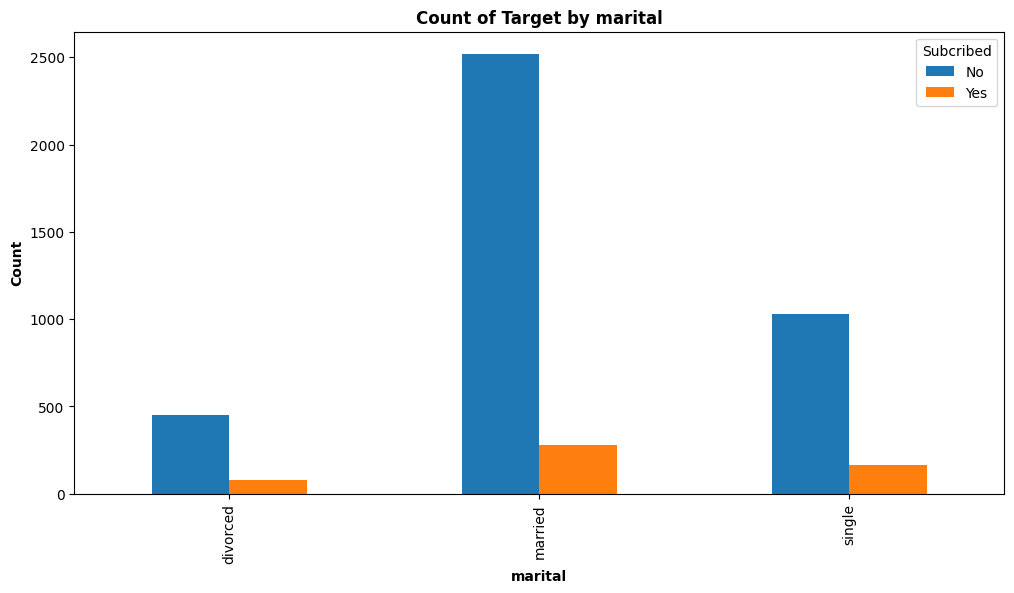

In [ ]:
categoricdist("marital")

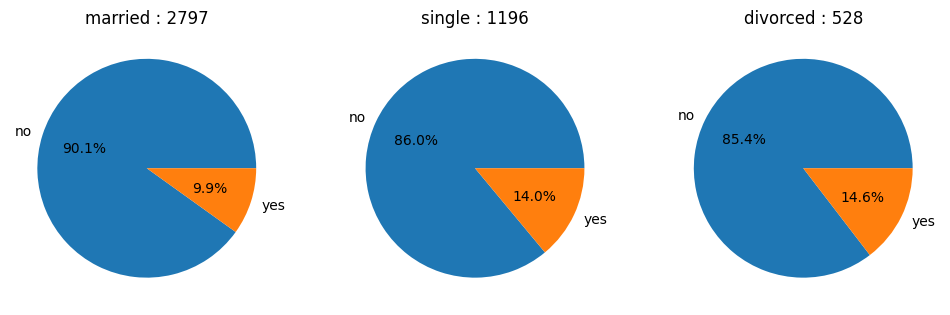

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 10))
marital = df["marital"].unique()
a = 0
for i in marital:
    d = df[df["marital"] == i]
    marital_datas = d.groupby('marital')['y'].value_counts()
    axes[a].pie(marital_datas, autopct='%1.1f%%', labels = ["no","yes"])
    axes[a].set_title(f"{i} : {marital_datas.sum()}")
    a += 1

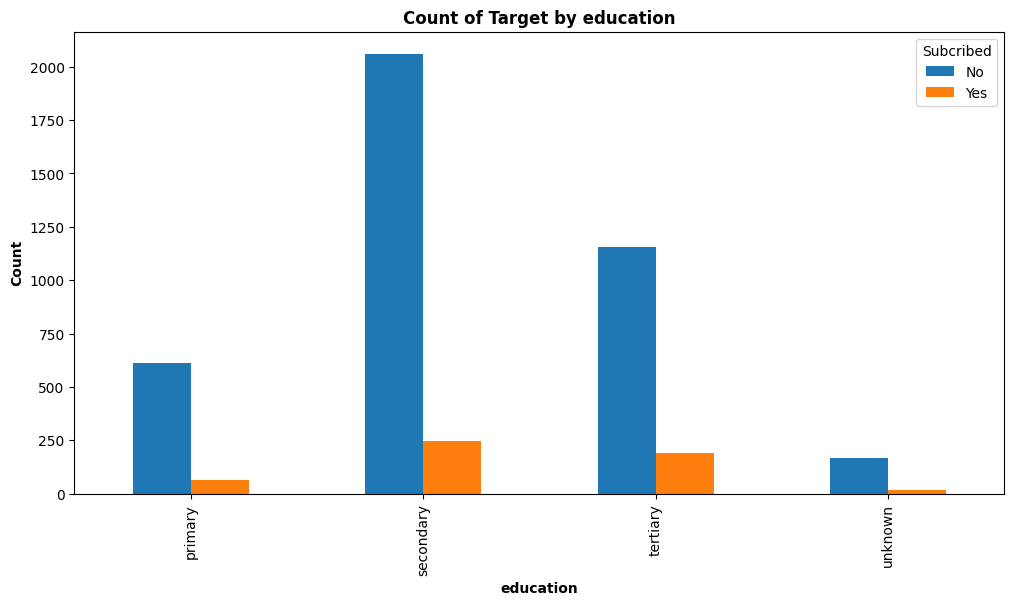

In [ ]:
categoricdist("education")

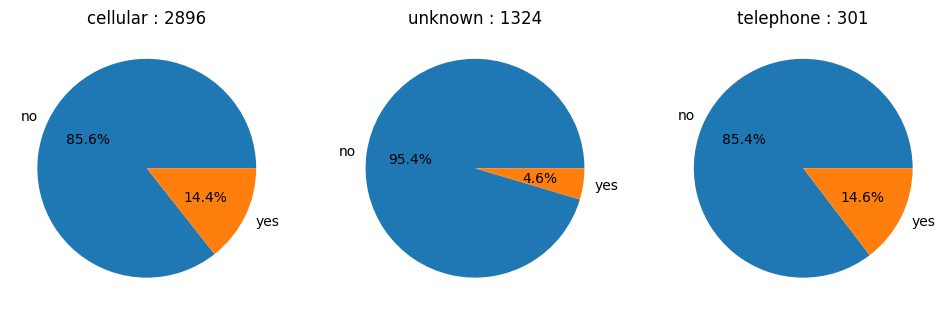

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 10))
contact = df["contact"].unique()
a = 0
for i in contact:
    d = df[df["contact"] == i]
    contact_datas = d.groupby('contact')['y'].value_counts()
    axes[a].pie(contact_datas, autopct='%1.1f%%', labels = ["no","yes"])
    axes[a].set_title(f"{i} : {contact_datas.sum()}")
    a += 1


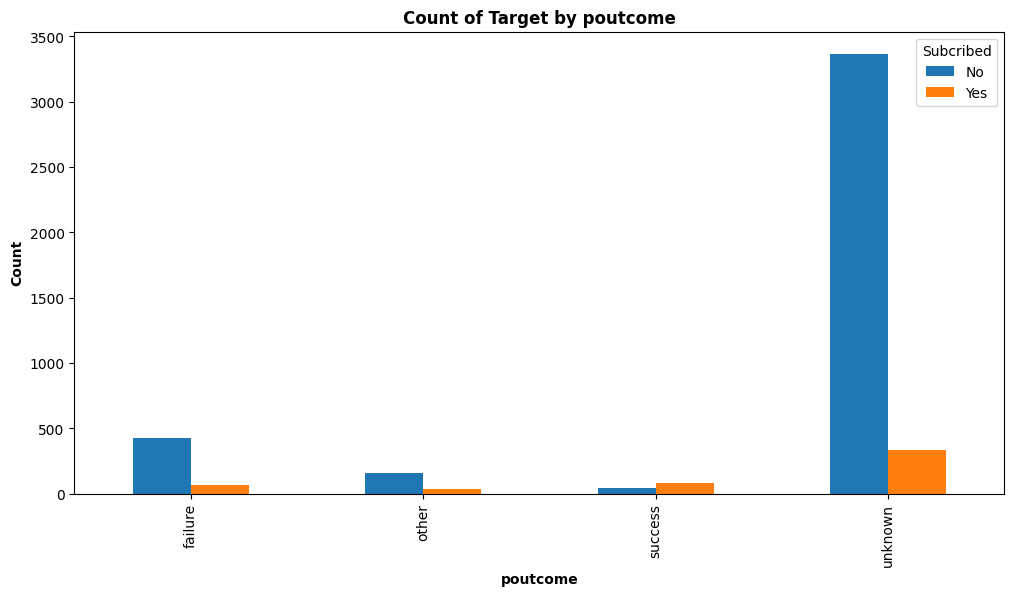

In [ ]:
categoricdist("poutcome")


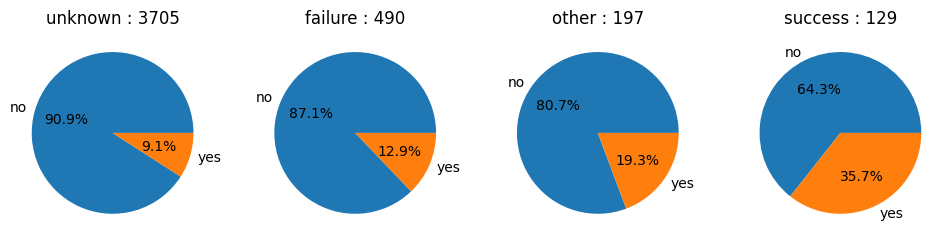

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12, 10))
poutcome = df["poutcome"].unique()
a = 0
for i in poutcome:
    d = df[df["poutcome"] == i]
    poutcome_datas = d.groupby('poutcome')['y'].value_counts()
    axes[a].pie(poutcome_datas, autopct='%1.1f%%', labels = ["no","yes"])
    axes[a].set_title(f"{i} : {poutcome_datas.sum()}")
    a += 1

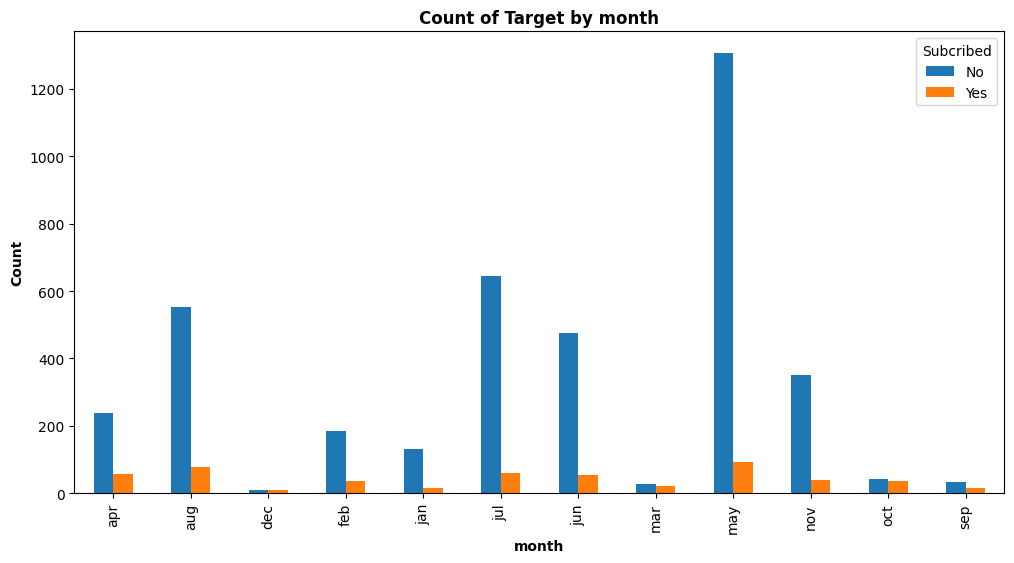

In [ ]:
categoricdist("month")


In [ ]:
month = df["month"].unique()

winmonth = df[df["y"] == "yes"]

Text(0.5, 1.0, 'Subscriptions by month')

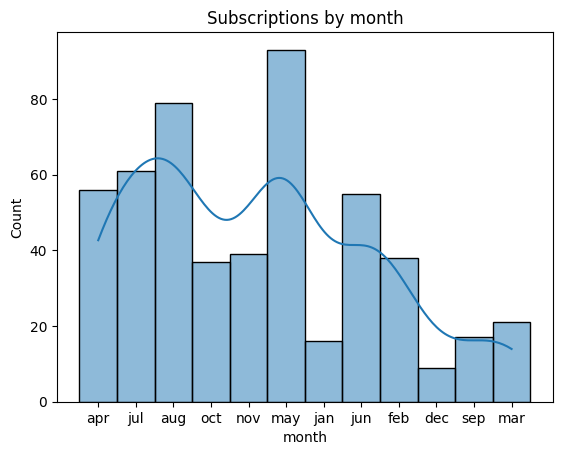

In [ ]:
sns.histplot(data = winmonth["month"], kde = True)
plt.title("Subscriptions by month")